The Aim of the analysis is to find descriminative features

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [12]:
data = pd.read_csv('HR_comma_sep.csv')
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


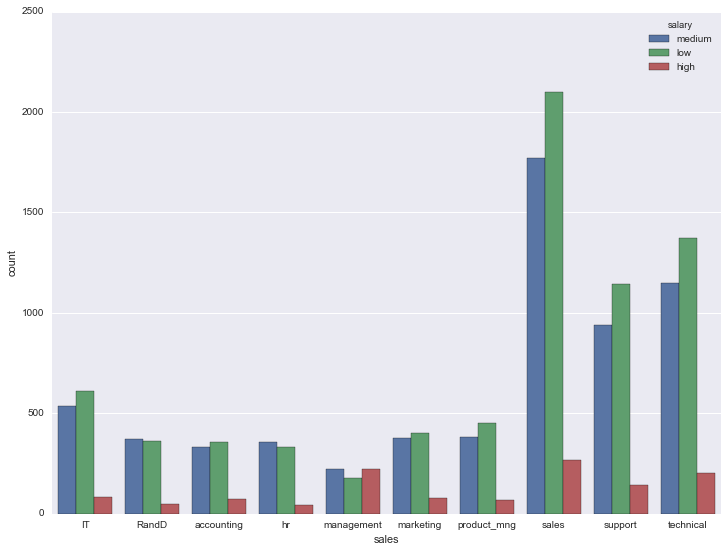

In [78]:
plt.figure(figsize = (12,9))
sns.countplot(hue="salary", data = data.sort_values(by = 'sales')[['salary', 'sales']], x = 'sales')

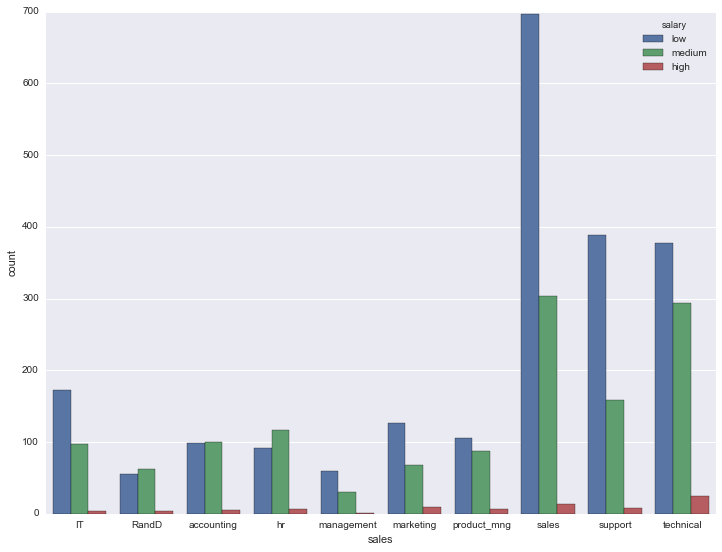

In [77]:
plt.figure(figsize = (12,9))
sns.countplot(hue="salary", data = data[data.left == 1].sort_values(by = 'sales')[['salary', 'sales']], x = 'sales')

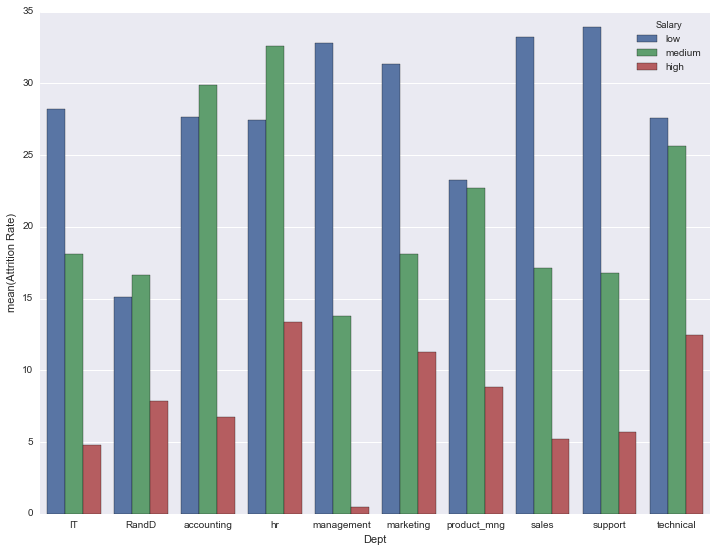

In [86]:
temp = data[['salary', 'sales', 'left']]
temp_Remain = temp[temp.left == 0][['salary', 'sales']].groupby(['sales', 'salary']).size()
temp_left = temp[temp.left == 1][['salary', 'sales']].groupby(['sales', 'salary']).size()
temp = (temp_left/(temp_Remain+temp_left))*100
temp = temp.reset_index()
temp.columns = ['Dept', 'Salary', 'Attrition Rate']
temp.Salary = temp.Salary.map({'high' : 2, 'medium' : 1, 'low' : 0})
temp = temp.sort_values(by = ['Dept','Salary'])
temp.Salary = temp.Salary.map({2 : 'high', 1 : 'medium', 0 : 'low'})
plt.figure(figsize = (12,9))
sns.barplot(x="Dept", y="Attrition Rate", hue="Salary", data=temp)